<a href="https://colab.research.google.com/github/e-olang/Computer-Vision/blob/main/Mkulima/Rice%20Leaf/resnet%2050.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%cd /content/drive/MyDrive/Colab Notebooks/Rice Leaf/

/content/drive/MyDrive/Colab Notebooks/Rice Leaf


In [2]:
%ls

data/  kaggle.json  notebook.ipynb  RiceLeafs/  riceleafs.zip


### modeling

In [3]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [4]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50

#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [5]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/Colab Notebooks/Rice Leaf/RiceLeafs/train'
valid_path = '/content/drive/MyDrive/Colab Notebooks/Rice Leaf/RiceLeafs/validation'

In [6]:
# Import the Resnet50 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

94781440/94765736 [==============================] - 0s 0us/step


In [7]:
# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [8]:
 # useful for getting number of output classes
folders = glob('/content/drive/MyDrive/Colab Notebooks/Rice Leaf/RiceLeafs/validation/*')

In [9]:
# our layers - you can add more if you want
x = Flatten()(resnet.output)

In [10]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [11]:
# view the structure of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [12]:
# tell the model what cost and optimization method to use
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [13]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [14]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/Rice Leaf/RiceLeafs/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 2684 images belonging to 4 classes.


In [15]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/Rice Leaf/RiceLeafs/validation',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')


Found 671 images belonging to 4 classes.


In [16]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
    training_set,
    validation_data=test_set,
    epochs=20,
    steps_per_epoch=len(training_set),
    validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/20
84/84 [==============================] - 1160s 14s/step - loss: 2.3493 - accuracy: 0.3454 - val_loss: 1.8034 - val_accuracy: 0.4307
Epoch 2/20
84/84 [==============================] - 414s 5s/step - loss: 1.6675 - accuracy: 0.3823 - val_loss: 2.3304 - val_accuracy: 0.4456
Epoch 3/20
84/84 [==============================] - 406s 5s/step - loss: 1.5090 - accuracy: 0.4031 - val_loss: 2.3304 - val_accuracy: 0.4322
Epoch 4/20
84/84 [==============================] - 408s 5s/step - loss: 1.6302 - accuracy: 0.4001 - val_loss: 1.8571 - val_accuracy: 0.2846
Epoch 5/20
84/84 [==============================] - 409s 5s/step - loss: 1.5291 - accuracy: 0.4180 - val_loss: 2.1748 - val_accuracy: 0.2668
Epoch 6/20
84/84 [==============================] - 403s 5s/step - loss: 1.3920 - accuracy: 0.4370 - val_loss: 2.4524 - val_accuracy: 0.2638
Epoch 7/20
84/84 [==============================] - 402s 5s/step - loss: 1.5695 - accuracy: 0.4039 - val_loss: 2.0714 - val_accuracy: 0.2191
Epoch 8/20


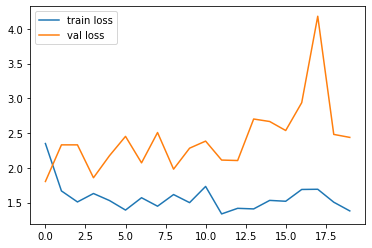

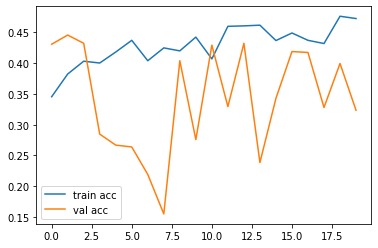

<Figure size 432x288 with 0 Axes>

In [18]:
import matplotlib.pyplot as plt

# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [19]:
from tensorflow.keras.models import load_model

model.save('model_resnet50.h5')